In [82]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage import feature

<Container object of 324 artists>

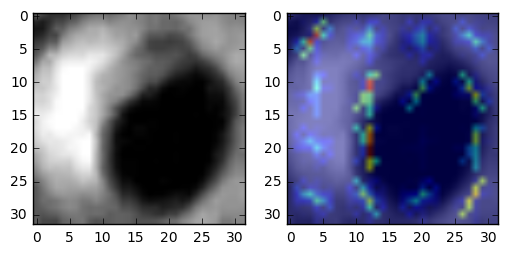

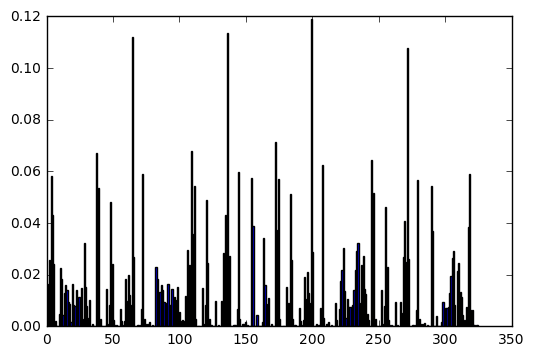

In [83]:
cr = io.imread(r'C:\home\projects\craters\true\cr_10.png', as_grey=True)
feat, feat_img = feature.hog(cr, visualise=True, pixels_per_cell=(8, 8))
x = np.linspace(1, len(feat), len(feat))

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(cr, cmap=plt.cm.gray_r)
plt.subplot(1, 2, 2)
plt.imshow(cr, cmap=plt.cm.gray_r)
plt.imshow(feat_img, alpha=0.5)

plt.figure()
plt.subplot(1, 1, 1)
plt.bar(x, feat)

<Container object of 2916 artists>

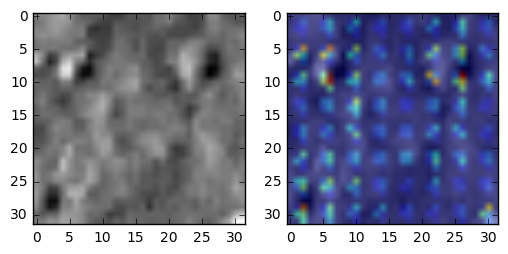

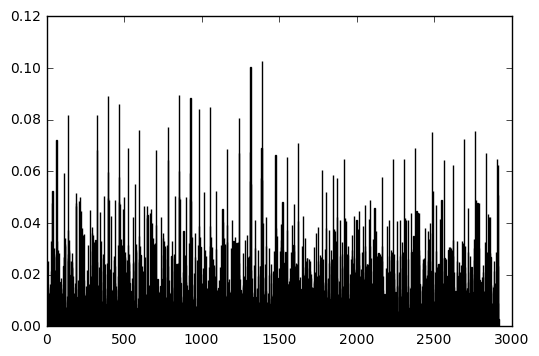

In [84]:
cr = io.imread(r'C:\home\projects\craters\false\n39.png', as_grey=True)
feat, feat_img = feature.hog(cr, visualise=True, pixels_per_cell=(4, 4))
x = np.linspace(1, len(feat), len(feat))

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(cr, cmap=plt.cm.gray_r)
plt.subplot(1, 2, 2)
plt.imshow(cr, cmap=plt.cm.gray_r)
plt.imshow(feat_img, alpha=0.5)

plt.figure()
plt.subplot(1, 1, 1)
plt.bar(x, feat)

In [4]:
from skimage.io import ImageCollection

def imread_asgrey(f,img_num):
    return io.imread(f, as_grey=True)
p = ImageCollection(r'C:\home\projects\craters\true\*.png', load_func=imread_asgrey)
n = ImageCollection(r'C:\home\projects\craters\false\*.png', load_func=imread_asgrey)
len(p), len(n)


(60, 40)

In [58]:
def hog(im):
    return feature.hog(im, pixels_per_cell=(4, 4))

features = [hog(p[i]) for i in range(len(p))] + [hog(n[i]) for i in range(len(n))]
target   = [1]*(len(p)) + [0]*(len(n))
data = np.array(features)
data.shape

(100, 2916)

In [124]:
from sklearn.cross_validation import train_test_split
train_data, test_data, train_res, test_res = train_test_split(data, target,test_size=0.33)
train_data.shape, len(train_res), test_data.shape, len(test_res)

((67, 2916), 67, (33, 2916), 33)

In [125]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=10000)
clf.fit(train_data, train_res)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [126]:
clf.score(test_data, test_res)

0.81818181818181823